# Distribuições

Pmf = Probability mass function, a vantagem de caclular assim é que ele é bem mais escalavel que os casos anteriores.

Distribuições: Um conjunto de outcomes e sua probabilidade de ocorrer.



In [3]:
from empiricaldist  import Pmf
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

#### Criando um Pmf de um flip de moeda na mão

In [119]:
coin = Pmf()
coin['heads'] = 0.5
coin['tails'] = 1/2
coin

,probs
heads,0.5
tails,0.5


#### Criando um Pmf de um dado de 6 lados e depois de 20

In [123]:
d6 = Pmf.from_seq([1,2,3,4,5,6])
d6

,probs
1,0.166667
2,0.166667
3,0.166667
4,0.166667
5,0.166667
6,0.166667


In [124]:
#A chance de acertar no Eldrith normal
d6([5,6]).sum()

0.3333333333333333

In [125]:
#A chance de acertar sendo abençoado
d6([4,5,6]).sum()

0.5

In [5]:
d20 = Pmf.from_seq(range(1,21))
d20

,probs
1,0.05
2,0.05
3,0.05
4,0.05
5,0.05
6,0.05
7,0.05
8,0.05
9,0.05
10,0.05


##### Qual a chance de rolar um 20?

In [46]:
d20[20]

0.05

#### Criando um Pmf de uma string

In [127]:
letters = Pmf.from_seq(list('Mississippi'))
letters

,probs
M,0.090909
i,0.363636
p,0.181818
s,0.363636


#### Qual é a probabilidade de a letra ser i?

In [53]:
letters['i'] 

0.36363636363636365

In [129]:
letters.idxmax()

'i'

#### Convertendo para um dataframe e ordenando por probabilidade

In [51]:
pd.DataFrame(letters.values, index=letters.index, columns=['probs']).sort_values('probs', ascending=False)

,probs
i,0.363636
s,0.363636
p,0.181818
M,0.090909


### Cookie problem
Suppose there are two bowls of cookies.

* Bowl 1 contains 30 vanilla cookies and 10 chocolate cookies.

* Bowl 2 contains 20 vanilla cookies and 20 chocolate cookies.

Now suppose you choose one of the bowls at random and, without looking, choose a cookie at random. If the cookie is vanilla, what is the probability that it came from Bowl 1?

In [59]:
likelihood_vannilla = [0.75, 0.5]
likelihood_chocolate = list(1 - np.array(likelihood_vannilla))

prior = Pmf.from_seq(['Bowl_1','Bowl_2'])
posterior = prior * likelihood_vannilla
posterior.normalize()
posterior

,probs
Bowl_1,0.6
Bowl_2,0.4


In [60]:
#Se colocamos o cookie de volta e fazemos um novo teste, qual a chance de tirarmos um segundo biscoito de chocolate?
posterior *= likelihood_chocolate
posterior.normalize()
posterior

,probs
Bowl_1,0.428571
Bowl_2,0.571429


### 101 Bowls
O bowl   0 terá  0% de cookies de baunilha<br>
O bowl  10 terá 10% de cookies de baunilha<br>
...<br>
O bowl 100 terá 100% de cookies de baunilha

In [112]:
def plot_graph(prior,posterior):
    plt.title(f'{posterior.shape[0] - 1} bowls')
    plt.plot(prior, label='Prior')
    plt.plot(posterior, label='Posterior')
    plt.legend()
    plt.show()

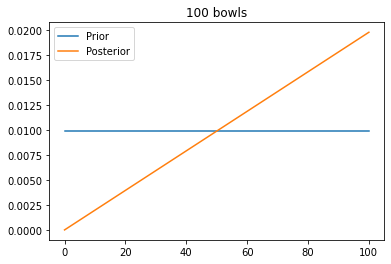

In [113]:
n = 101 #Quantidade de bowls

hypos = np.arange(n)
prior = Pmf(1, hypos) 
prior.normalize()
likelihood_vanilla = hypos/100
posterior = prior * likelihood_vanilla
posterior.normalize()
plot_graph(prior, posterior)

Prior é a chance de escolher o determinado pote, enquanto o posterior é a chance de tirar um biscoito de baunilha dele.

In [114]:
#Melhor porcentagem para o cénario
posterior.idxmax()

100

#### Segunda rodada
Agora vamos para o cenário de tirarmos o cookie de baunilha e depois devolvelo e tirarmos novamente um outro de baunilha? 

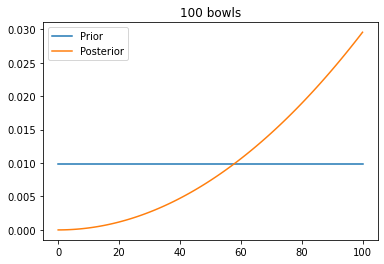

In [115]:
posterior = posterior * likelihood_vanilla
posterior.normalize()
plot_graph(prior, posterior)

In [116]:
#Melhor porcentagem para o cénario
posterior.idxmax()

100

Os potes que tem mais cookies ficam com acentuados enquanto os que tem menos cookies ficam menores.

#### Terceira rodada
Agora vamos fazer o mesmo que a segunda rodada mas com a possibilidade de ter um cookie de chocolate

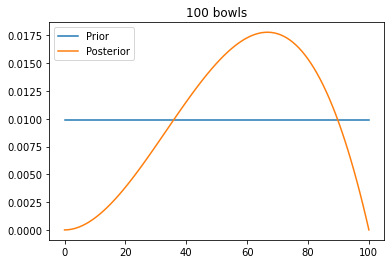

In [117]:
likelihood_chocolate = 1 - hypos/100
posterior = posterior * likelihood_chocolate
posterior.normalize()
plot_graph(prior, posterior)

Agora temos um efeito que os ultimos potes não tem tanto cookie de chocolate e por isso ficam desfavoraveis.

In [118]:
#Melhor porcentagem para o cénario
posterior.idxmax()

67

### Dice problem

In [24]:
hypos = [6, 8, 12]
prior = Pmf(1/3, hypos)

In [37]:
#Chance de rolar 1
likelihood = [1/6,1/8,1/12]
posterior = prior * likelihood
posterior.normalize()
posterior

,probs
6,0.444444
8,0.333333
12,0.222222


In [36]:
#Chance de rolar 8
likelihood = 0, 1/8, 1/12
posterior = prior * likelihood
posterior.normalize() 
posterior

,probs
6,0.0
8,0.6
12,0.4


In [38]:
def update_dice(pmf, data):
    """Update pmf based on new data."""
    hypos = pmf.qs
    likelihood = 1 / hypos
    impossible = (data > hypos)
    likelihood[impossible] = 0
    pmf *= likelihood
    pmf.normalize()

In [ ]:
update_dice()

In [50]:
#Fazer o PMF da rolagem de dois dados
sequence = []

for d1 in range(1,7):
    for d2 in range(1,7):
        sequence.append(d1+d2)


In [51]:
pmf = Pmf.from_seq(sequence)

In [67]:
pmf

,probs
2,0.027778
3,0.055556
4,0.083333
5,0.111111
6,0.138889
7,0.166667
8,0.138889
9,0.111111
10,0.083333
11,0.055556


In [66]:
pd.DataFrame(pmf.round(2))

,
2,0.03
3,0.06
4,0.08
5,0.11
6,0.14
7,0.17
8,0.14
9,0.11
10,0.08
11,0.06


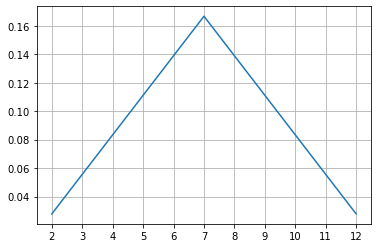

In [61]:
pmf.plot()
plt.xticks(pmf.index)
plt.grid()
plt.show()

In [48]:
#Maxima chance
pmf[pmf == pmf.max()]

21    0.05
Name: , dtype: float64

In [49]:
#Minima chance
pmf[pmf == pmf.min()]

2     0.0025
40    0.0025
Name: , dtype: float64

7    0.166667
Name: , dtype: float64

,probs
Bowl_1,0.428571
Bowl_2,0.571429


In [78]:
n = 100
prior = Pmf.from_seq(range(n+1))
prior

,probs
0,0.009901
1,0.009901
2,0.009901
3,0.009901
4,0.009901
...,...
96,0.009901
97,0.009901
98,0.009901
99,0.009901


In [79]:
prior.index * prior

,probs
0,0.000000
1,0.009901
2,0.019802
3,0.029703
4,0.039604
...,...
96,0.950495
97,0.960396
98,0.970297
99,0.980198
